## Task 4.1 Hand-designed MLP

Design an MLP that exactly recognizes the blue region bounded by the given line segments. The network should not be learned. Instead, design the weights and biases by hand.  
_Hint_: Setup 4 neurons, one for each separation line, and connect them using further neurons representing AND or OR operations.  
Use the [Heaviside](https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html) activation function to yield a sharp decision:
\begin{equation*}
    H(x) = \begin{cases} 1 &\quad\text{if $x \geq 0$} \\ 0 &\quad\text{else}\end{cases}
\end{equation*}

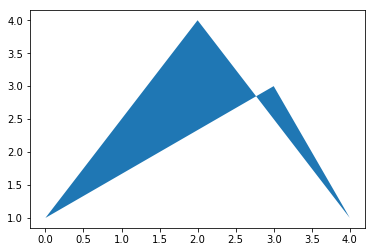

In [3]:
import numpy as np
from matplotlib import pyplot as plt
region = np.array([[0,1], [3, 3], [3, 3], [4, 1], [4, 1], [2, 4], [2, 4], [0, 1]])
plt.fill(*region.T)
plt.show()

## Task 4.2 Activation Functions

Given the following definitions of the logistic function and tanh:
\begin{align}
  \sigma(x) &= \frac{1}{1 + e^{-x}} \\
  \tanh(x) &= \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{align}

prove the following identities:
\begin{align}
  \tanh(x) &= 2 \sigma(2x) - 1 \\
  \frac{\partial}{\partial x}\sigma(x) &= \sigma(x) \cdot (1-\sigma(x)) \\
  \frac{\partial}{\partial x}\tanh(x) &= 1 - \tanh^2(x)
\end{align}

## Task 4.3 Computation Graph

Consider the following computational graph:

![https://github.com/rhaschke/Neural-Networks/blob/master/backprop.svg](https://raw.githubusercontent.com/rhaschke/Neural-Networks/master/backprop.svg)

1. Write the computational graph as a formula: $y = $

2. Perform a forward pass for the graph, starting with the given values for $\mathbf W$, $\mathbf x$, and $\mathbf t$.
Denote the results directly in the graph, above the connecting arrow lines.

3. Determine the local gradients of all operation nodes, in component-wise notation, i.e.:
\begin{align}
+: &\qquad \frac{\partial e_i}{\partial z_j} = \delta_{ij} &\quad &\frac{\partial e_i}{\partial u_j} = \delta_{ij} \\
\|\cdot\|^2: &\\
\times: &\\
\times\text{-}1: &\\
\end{align}

4. Perform a full backward-pass, denoting the results in the graph below the connecting arrow lines.